#### Here I will document my method for cleaning my data files, which were taken from Kaggle's dataset “Comments on articles published in the New York Times” (https://www.kaggle.com/aashita/nyt-comments).
    
This code is broken into two sections - one cleans the data files with articles and one cleans the data files with comments.

The first block of this code combines my data files into a single large file, one each for articles and comments.

In [2]:
import glob
import os
os.chdir(r"C:\Users\msteele9\Documents\Springboard\Springboard\Data")

import pandas as pd
import glob
interesting_files = glob.glob("Articles*.csv")
df_list = []
for filename in sorted(interesting_files):
    df_list.append(pd.read_csv(filename))
full_df = pd.concat(df_list)

full_df.to_csv('allArticles.csv', index=False)

C:\Users\msteele9\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [3]:
interesting_files = glob.glob("../../Comments*.csv")
df_list = []
for filename in sorted(interesting_files):
    df_list.append(pd.read_csv(filename))
full_df = pd.concat(df_list)

full_df.to_csv('allComments.csv', index=False)

C:\Users\msteele9\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\msteele9\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\msteele9\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (14,15,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\msteele9\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (32,33) have

In [15]:
import pandas as pd
import numpy as np
import nltk
#nltk.download('wordnet')
import re
sent_token = nltk.sent_tokenize
import csv  
from nltk import sent_tokenize, word_tokenize, pos_tag
import re
from sklearn.feature_extraction.text import CountVectorizer
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

#For all data - train = pd.read_csv("/root/Springboard/Data/cleaning/allArticles.csv")
train = pd.read_csv(r"C:\Users\msteele9\Documents\Springboard\Springboard\Data\allArticles.csv", index_col = False)
#train = pd.read_csv(r"/mnt/c/Users/msteele9/Documents/Springboard/Springboard/Data/allArticles.csv")

train.head(5)

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,58def1347c459f24986d7c80,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,One of the largest photo displays in Times his...,The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
1,NaN,58def3237c459f24986d7c84,823,By GAIL COLLINS,article,"And Now, the Dreaded Trump Curse","['United States Politics and Government', 'Tru...",3,OpEd,23,2017-04-01 00:23:58,Unknown,Meet the gang from under the bus.,The New York Times,Op-Ed,https://www.nytimes.com/2017/03/31/opinion/and...
2,NaN,58def9f57c459f24986d7c90,575,By THE EDITORIAL BOARD,article,Venezuela’s Descent Into Dictatorship,"['Venezuela', 'Politics and Government', 'Madu...",3,Editorial,22,2017-04-01 00:53:06,Unknown,A court ruling annulling the legislature’s aut...,The New York Times,Editorial,https://www.nytimes.com/2017/03/31/opinion/ven...
3,NaN,58defd317c459f24986d7c95,1374,By MICHAEL POWELL,article,Stain Permeates Basketball Blue Blood,"['Basketball (College)', 'University of North ...",3,Sports,1,2017-04-01 01:06:52,College Basketball,"For two decades, until 2013, North Carolina en...",The New York Times,News,https://www.nytimes.com/2017/03/31/sports/ncaa...
4,NaN,58df09b77c459f24986d7ca7,708,By DEB AMLEN,article,Taking Things for Granted,['Crossword Puzzles'],3,Games,0,2017-04-01 02:00:14,Unknown,In which Howard Barkin and Will Shortz teach u...,The New York Times,News,https://www.nytimes.com/2017/03/31/crosswords/...


# Initial goals: 

-Make sure the contents of each field are the correct type and have no missing data (i.e. scrub the 'NaN' from the 'abstract' field)

-Make sure that the data comes properly tokenized

-Convert all words to lowercase (to avoid confusion between uppercase and lowercase versions of the same word)

Several of these data columns (articleID, articleWordCount, multimedia, printPage) contain only integers or single lowercase words.

In [16]:
#nltk.download('wordnet')
#for column in train:
    #print(train[column].get_dtype_counts())
    
print(train.dtypes.value_counts())

print("")

for column in train:
    print(train[column].dtypes)

object    13
int64      3
dtype: int64

object
object
int64
object
object
object
object
int64
object
int64
object
object
object
object
object
object


###### From the above code, the only integer columns are 2, 7 and 9. The rest are string columns and need to be converted to lowercase. 

In [17]:
sampleSize = 50000
train = pd.read_csv(r"C:\Users\msteele9\Documents\Springboard\Springboard\Data\allArticles.csv", header=0, nrows=sampleSize)
#train.head(5)

wn = nltk.WordNetLemmatizer()

nonstrings = [2, 7, 9]


train= train.astype(str)
train.fillna(0)

def clean_articles(doc):
    for index, column in enumerate(doc):
        if index in nonstrings:
            doc[column] = doc[column].astype(str)
            continue
        doc[column] = doc[column].str.replace('[^\w\s]','')
        doc[column] = doc[column].str.lower()
        #doc[column] = doc[column].str.strip()
        doc[column] = doc[column].replace(np.nan, ' ', regex=True)
        doc[column].apply(nltk.word_tokenize)
        doc[column].apply(lemmatize_text)
        doc[column] = [token for token in doc[column] if token not in stop_words]     
    return doc

def lemmatize_text(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

clean_art = clean_articles(train)

clean_art.head(5)

#print('\n'.join(clean))


,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,nan,58def1347c459f24986d7c80,716,by stephen hiltner and susan lehman,article,finding an expansive view of a forgotten peop...,photography new york times niger ferguson adam...,3,insider,2,20170401 001541,unknown,one of the largest photo displays in times his...,the new york times,news,httpswwwnytimescom20170331insidernigermigrants...
1,nan,58def3237c459f24986d7c84,823,by gail collins,article,and now the dreaded trump curse,united states politics and government trump do...,3,oped,23,20170401 002358,unknown,meet the gang from under the bus,the new york times,oped,httpswwwnytimescom20170331opinionandnowthedrea...
2,nan,58def9f57c459f24986d7c90,575,by the editorial board,article,venezuelas descent into dictatorship,venezuela politics and government maduro nicolas,3,editorial,22,20170401 005306,unknown,a court ruling annulling the legislatures auth...,the new york times,editorial,httpswwwnytimescom20170331opinionvenezuelasdes...
3,nan,58defd317c459f24986d7c95,1374,by michael powell,article,stain permeates basketball blue blood,basketball college university of north carolin...,3,sports,1,20170401 010652,college basketball,for two decades until 2013 north carolina enga...,the new york times,news,httpswwwnytimescom20170331sportsncaabasketball...
4,nan,58df09b77c459f24986d7ca7,708,by deb amlen,article,taking things for granted,crossword puzzles,3,games,0,20170401 020014,unknown,in which howard barkin and will shortz teach u...,the new york times,news,httpswwwnytimescom20170331crosswordstakingthin...


###### I want to check for cells that have missing elements.

In [18]:
print("Any null values left: ")
print(clean_art.isnull().values.any())
print("Dataset size: ")
print(len(train))

Any null values left: 
False
Dataset size: 
9335


###### Now we want a separate section to clean the comment files.

In [31]:
#For all data - train = pd.read_csv("/root/Springboard/Data/cleaning/allComments.csv")

sampleSize = 50000
train = pd.read_csv(r"C:\Users\msteele9\Documents\Springboard\Springboard\Data\allComments.csv", nrows=sampleSize)

#train['recommendations'].head(5)
train

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1491245186,58def1347c459f24986d7c80,716.0,This project makes me happy to be a 30+ year T...,22022598.0,22022598.0,<br/>,comment,1.491237e+09,1.0,...,approved,1.0,0.0,News,1491245186,Rob Gayle,46006296.0,"Riverside, CA",NaN,NaN
1,1491188619,58def1347c459f24986d7c80,716.0,Stunning photos and reportage. Infuriating tha...,22017350.0,22017350.0,NaN,comment,1.491180e+09,1.0,...,approved,1.0,0.0,News,1491188619,Susan A.,29202761.0,<br/>,NaN,NaN
2,1491188617,58def1347c459f24986d7c80,716.0,Brilliant work from conception to execution. I...,22017334.0,22017334.0,<br/>,comment,1.491179e+09,1.0,...,approved,1.0,0.0,News,1491188617,Meta,63944806.0,Raleigh NC,NaN,NaN
3,1491167820,58def1347c459f24986d7c80,716.0,NYT reporters should provide a contributor's l...,22015913.0,22015913.0,<br/>,comment,1.491150e+09,1.0,...,approved,1.0,0.0,News,1491167820,Tom Wyrick,1266184.0,"Missouri, USA",NaN,NaN
4,1491167815,58def1347c459f24986d7c80,716.0,Could only have been done in print. Stunning.,22015466.0,22015466.0,<br/>,comment,1.491147e+09,1.0,...,approved,1.0,0.0,News,1491167815,Joe Sharkey,61121360.0,"Tucson, Arizona",NaN,NaN
5,1491142576,58def1347c459f24986d7c80,716.0,Thank you New York Times. People should be sup...,22012085.0,22012085.0,<br/>,comment,1.491129e+09,1.0,...,approved,1.0,0.0,News,1491142576,dramaman,59125002.0,new york,NaN,NaN
6,1491060909,58def1347c459f24986d7c80,716.0,Proof that photojournalism is alive and well. ...,22003784.0,22003784.0,<br/>,comment,1.491056e+09,1.0,...,approved,1.0,0.0,News,1491060909,Bob Williams,320791.0,"East Northport, NY",NaN,NaN
7,1491252241,58def1347c459f24986d7c80,716.0,"The OASIS Initiative, which I started with Pro...",22024897.0,22024897.0,<br/>,userReply,1.491248e+09,2.0,...,approved,1.0,0.0,News,1491252241,Alisha G,65289571.0,"Tahoma, CA",NaN,NaN
8,1491668599,58def1347c459f24986d7c80,716.0,I agree. I've just spent 30 minutes trying to ...,22082978.0,22082978.0,NaN,userReply,1.491665e+09,2.0,...,approved,1.0,0.0,News,1491668599,Kathy Mortensen,76442479.0,Ann Arbor,NaN,NaN
9,1491064414,58def3237c459f24986d7c84,823.0,How about Katrina Pierson? Back to Palookavill...,22004930.0,22004930.0,<br/>,comment,1.491061e+09,1.0,...,approved,1.0,0.0,Op-Ed,1491064414,Gaucho54,59237391.0,California,NaN,NaN


In [32]:
train= train.astype(str)
train.fillna(0)
strings = [1, 5, 10, 22, 24, 25, 26, 29, 30, 33]

def lemmatize_text(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

def clean_articles(doc):
    for index, column in enumerate(doc):
        if index in strings:         
            doc[column] = doc[column].str.replace('[^\w\s]','')
            doc[column] = doc[column].str.lower()
            #doc[column] = doc[column].str.strip()
            doc[column] = doc[column].replace(np.nan, '', regex=True)
            doc[column].apply(nltk.word_tokenize)
            doc[column].apply(lemmatize_text)
            doc[column].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
        else:
            doc[column] = doc[column].astype(str)
            continue
    return doc

clean_comments = clean_articles(train)
#The second command takes awhile to run
clean_comments.head(5)

clean_comments['recommendations'].head(50)

0       2.0
1       1.0
2       3.0
3       7.0
4       5.0
5       8.0
6       9.0
7       1.0
8       0.0
9      60.0
10     96.0
11     61.0
12    154.0
13    178.0
14    134.0
15     91.0
16    134.0
17     33.0
18     57.0
19    128.0
20    168.0
21    111.0
22     44.0
23     75.0
24    137.0
25    151.0
26     60.0
27    104.0
28     15.0
29     28.0
30    107.0
31     43.0
32     34.0
33     49.0
34     18.0
35     42.0
36     60.0
37     89.0
38     23.0
39     38.0
40     79.0
41     37.0
42     89.0
43     21.0
44     72.0
45     79.0
46     20.0
47     15.0
48     39.0
49     29.0
Name: recommendations, dtype: object

In [35]:
print("Any null values left: "), print(clean_comments.isnull().values.any())

Any null values left: 
False


(None, None)

In [36]:
print(len(clean_comments))
clean_comments.nunique()

50000


approveDate              23464
articleID                  174
articleWordCount           163
commentBody              49923
commentID                50000
commentSequence          50000
commentTitle                 2
commentType                  3
createDate               46960
depth                        3
editorsSelection             2
inReplyTo                 8301
newDesk                     24
parentID                  8301
parentUserDisplayName     5033
permID                   50000
picURL                    2017
printPage                   29
recommendations            671
recommendedFlag              1
replyCount                  46
reportAbuseFlag              1
sectionName                 22
sharing                      2
status                       1
timespeople                  2
trusted                      2
typeOfMaterial              10
updateDate               25925
userDisplayName          17170
userID                   22530
userLocation              7292
userTitl

I see that there are no null values remaining, but looking at the dataframe I see that several columns contain nothing but 'nan' strings or otherwise have only one value. I want to drop the commentTitle (contains only <br/> or nan), recommendedFlag, reportAbuseFlag, status, timespeople, userTitle and userURL columns.

In [37]:
clean_comments.drop(columns=['commentTitle', 'recommendedFlag', 'reportAbuseFlag', 'status', 'timespeople', 'userTitle', 'userURL'], axis=1, inplace=True)

clean_comments.head(5)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentType,createDate,depth,editorsSelection,...,recommendations,replyCount,sectionName,sharing,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation
0,1491245186,58def1347c459f24986d7c80,716.0,This project makes me happy to be a 30+ year T...,22022598.0,220225980,comment,1491237056.0,1.0,0,...,2.0,0.0,unknown,0,00,News,1491245186,rob gayle,460062960,"Riverside, CA"
1,1491188619,58def1347c459f24986d7c80,716.0,Stunning photos and reportage. Infuriating tha...,22017350.0,220173500,comment,1491180489.0,1.0,0,...,1.0,0.0,unknown,0,00,News,1491188619,susan a,292027610,<br/>
2,1491188617,58def1347c459f24986d7c80,716.0,Brilliant work from conception to execution. I...,22017334.0,220173340,comment,1491179470.0,1.0,0,...,3.0,0.0,unknown,0,00,News,1491188617,meta,639448060,Raleigh NC
3,1491167820,58def1347c459f24986d7c80,716.0,NYT reporters should provide a contributor's l...,22015913.0,220159130,comment,1491150196.0,1.0,0,...,7.0,2.0,unknown,0,00,News,1491167820,tom wyrick,12661840,"Missouri, USA"
4,1491167815,58def1347c459f24986d7c80,716.0,Could only have been done in print. Stunning.,22015466.0,220154660,comment,1491147284.0,1.0,0,...,5.0,0.0,unknown,0,00,News,1491167815,joe sharkey,611213600,"Tucson, Arizona"


###### I check my working directory to make sure I am saving the files where I want them stored.

In [38]:
# 
import os
os.chdir(r"C:\Users\msteele9\Documents\Springboard\Springboard\Data")
art_file_name = "cleaned_article_data.csv"
clean_art_csv = clean_art.to_csv(art_file_name, encoding='utf-8', index=False)

In [39]:
com_file_name = "cleaned_comment_data.csv"
clean_com_csv = clean_comments.to_csv(com_file_name, encoding='utf-8', index=False)

###### Here I have saved the cleaned data files to storage. This is a good break point where I can use these files to begin looking at possible ML models. 
    
   In the next section, I will explore the data, looking at features and ways to visualize the feature set. I begin by re-importing the libraries that I will use. That way, this section of the notebook can be reran separately later. I will load the cleaned files in so that I know I am not making any changes to the stored version.

In [13]:
import pandas as pd
import numpy as np
import nltk
#ntlk.download()
import re
sent_token = nltk.sent_tokenize
import csv  
from nltk import sent_tokenize, word_tokenize, pos_tag
import re
from sklearn.feature_extraction.text import CountVectorizer
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

file_path_art = r"C:\Users\msteele9\Documents\Springboard\Springboard\Data\cleaned_article_data.csv"
clean_art = pd.read_csv(file_path_art, index_col = False)
clean_art

file_path_comments = r"C:\Users\msteele9\Documents\Springboard\Springboard\Data\cleaned_comment_data.csv"
clean_comments = pd.read_csv(file_path_comments, index_col = False)

###### In the above cell, I loaded in the cleaned article data. Here I load in the cleaned data and do preprocessing to run the data through a random forest model. 
    
   I want to make sure that my data can actually be loaded and that my simple test will produce results of some sort - this way I know that my data will not break when I try to load it.
   
   My target is the number of recommendations that the comment receives. I want to know how well a simple model can predict the number of recommendations a comment will receive when given the rest of that comment's data.


In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

features = clean_comments.columns.tolist()
print(features)

['approveDate', 'articleID', 'articleWordCount', 'commentBody', 'commentID', 'commentSequence', 'commentType', 'createDate', 'depth', 'editorsSelection', 'inReplyTo', 'newDesk', 'parentID', 'parentUserDisplayName', 'permID', 'picURL', 'printPage', 'recommendations', 'replyCount', 'sectionName', 'sharing', 'trusted', 'typeOfMaterial', 'updateDate', 'userDisplayName', 'userID', 'userLocation']


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

features = clean_comments.columns.tolist()
output = 'recommendations'
features.remove('recommendations')

for column in clean_comments.columns:
    clean_comments[column] = clean_comments[column].astype(str)
    if clean_comments[column].dtype == type(object):
        clean_comments[column] = le.fit_transform(clean_comments[column])

#print(features)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

clean_comments.astype(float)
clean_comments.head(5)

#clean_comments.dtypes

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,replyCount,sectionName,sharing,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation
0,2451,0,10,4019,4564,4564,0,4494,0,0,0,4,0,691,4673,11,2,85,0,5,0,0,1,2570,2432,1095,1133
1,2300,0,10,3292,4334,4334,0,4266,0,0,0,4,0,691,4468,11,2,1,0,5,0,0,1,2393,2728,588,15
2,2299,0,10,702,4328,4328,0,4260,0,0,0,4,0,691,4463,11,2,128,0,5,0,0,1,2392,1901,2283,1106
3,2154,0,10,2616,3965,3965,0,3899,0,0,0,4,0,691,4123,11,2,218,11,5,0,0,1,2240,2848,56,815
4,2153,0,10,815,3895,3895,0,3831,0,0,0,4,0,691,4070,9,2,181,0,5,0,0,1,2239,1367,2027,1368


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param = {'n_estimators': [5, 10, 20],
         'max_depth': [5, 10, 20] }

gs=GridSearchCV(rf, param, cv=5, n_jobs=5)

gs_fit = gs.fit(clean_comments[features], clean_comments[output])


C:\Users\msteele9\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\msteele9\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
pd.DataFrame(gs_fit.cv_results_).sort_values(by=['rank_test_score']).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.209999,0.032261,0.049001,0.016625,5,20,"{'max_depth': 5, 'n_estimators': 20}",0.113578,0.094862,0.104555,0.084855,0.126087,0.1050,0.013981,1
1,0.110998,0.017192,0.024801,0.006676,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.106746,0.087945,0.101449,0.093448,0.084783,0.0954,0.008362,2
0,0.053997,0.011046,0.013801,0.003487,5,5,"{'max_depth': 5, 'n_estimators': 5}",0.096499,0.101779,0.077640,0.083781,0.113043,0.0946,0.012298,3
4,0.187999,0.036900,0.014201,0.002639,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.043553,0.077075,0.083851,0.076262,0.051087,0.0656,0.016272,4
7,0.346799,0.069171,0.016800,0.003488,20,10,"{'max_depth': 20, 'n_estimators': 10}",0.037575,0.075099,0.078675,0.059076,0.054348,0.0602,0.015404,5


###### A quick GridSearch with a random forest classifier was able run on my data set and produce an accuracy score. My goal was to confirm that I can run ML algorithms on my data set and get sensible results; this test seems to verify this.

Here I am looking to see what the best model is doing. Only a few of our features have a strong impact on the number of recommendations. It looks like the dominant features are the approve date and the comment body. These intuitively make sense - we expect the content of the comment to be one of if not the most important feature, and the time the comment is posted likely determines how many people will see it.

Feature ranking:
1. feature 10 : (approveDate) (0.130671)
2. feature 8 : (articleID) (0.099294)
3. feature 12 : (articleWordCount) (0.096162)
4. feature 13 : (commentBody) (0.068331)
5. feature 6 : (commentID) (0.063723)
6. feature 0 : (commentSequence) (0.063134)
7. feature 5 : (commentType) (0.057948)
8. feature 4 : (createDate) (0.056519)
9. feature 22 : (depth) (0.054733)
10. feature 14 : (editorsSelection) (0.053763)
11. feature 7 : (inReplyTo) (0.039361)
12. feature 16 : (newDesk) (0.030759)
13. feature 3 : (parentID) (0.024253)
14. feature 25 : (parentUserDisplayName) (0.023475)
15. feature 23 : (permID) (0.021513)
16. feature 24 : (picURL) (0.018162)
17. feature 1 : (printPage) (0.016359)
18. feature 11 : (replyCount) (0.016063)
19. feature 17 : (sectionName) (0.016015)
20. feature 18 : (sharing) (0.014777)
21. feature 2 : (trusted) (0.013862)
22. feature 21 : (typeOfMaterial) (0.008109)
23. feature 15 : (updateDate) (0.007943)
24. feature 20 : (userDisplayName) (0.002014)
25. 

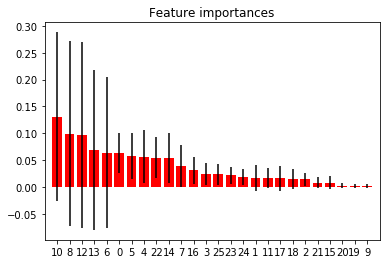

In [19]:
import matplotlib.pyplot as plt

importances = gs_fit.best_estimator_.feature_importances_

std = np.std([tree.feature_importances_ for tree in gs_fit.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(clean_comments[features].shape[1]):
    print("%d. feature %d : (%s) (%f)" % (f + 1, indices[f], features[f], importances[indices[f]]))
    
    # Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(clean_comments[features].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(clean_comments[features].shape[1]), indices)
plt.xlim([-1, clean_comments[features].shape[1]])
plt.show()